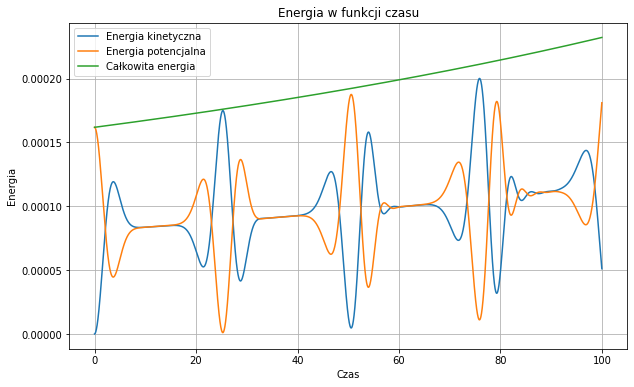

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
N = 50
dt = 0.02
delta = 0.1
alpha = 1
m = 1
nt = 5000
sigma = 3 * delta

# Funkcja obliczająca nowe położenia i prędkości
def calculate_new_positions_and_velocities(s, s_dot, N, delta, alpha, m):
    new_s = np.zeros_like(s)
    new_s_dot = np.zeros_like(s_dot)
    
    # Obliczanie nowych położeń i prędkości dla węzłów wewnętrznych
    for i in range(1, N):
        new_s[i] = s[i] + dt * s_dot[i]
        new_s_dot[i] = s_dot[i] + dt * (alpha / m) * (s[i-1] - 2 * s[i] + s[i+1])
    
    # Warunki brzegowe
    
    new_s[0] = s[0]
    new_s[N] = s[N]
    new_s_dot[0] = 0
    new_s_dot[N] = 0
    
    return new_s, new_s_dot

# Warunki początkowe
x_max = delta * N
x_eq = np.arange(0, x_max + delta, delta) 


s_0 = x_eq + delta / 3 * np.exp(-((x_eq - x_max / 2)**2) / (2 * sigma**2)) # (20)

s_dot_0 = np.zeros_like(s_0) # (21)

# Lista przechowująca energię kinetyczną, potencjalną i całkowitą w kolejnych krokach czasowych
kinetic_energy = []
potential_energy = []
total_energy = []

# Symulacja propagacji zaburzenia w łańcuchu
s = s_0.copy()
s_dot = s_dot_0.copy()

for _ in range(nt):
    # Obliczenie nowych położeń i prędkości
    s, s_dot = calculate_new_positions_and_velocities(s, s_dot, N, delta, alpha, m)
    
    # Obliczenie energii kinetycznej
    kinetic = 0.5 * m * np.sum(s_dot[1:N]**2)
    kinetic_energy.append(kinetic)
    
    # Obliczenie energii potencjalnej
    potential = 0
    for i in range(1, N+1):
        potential += 0.5 * alpha * (s[i-1] - s[i] + delta)**2
    potential_energy.append(potential)
    
    # Całkowita energia
    total_energy.append(kinetic + potential)

# Konwersja list na tablice numpy
kinetic_energy = np.array(kinetic_energy)
potential_energy = np.array(potential_energy)
total_energy = np.array(total_energy)

# Czas symulacji
time = np.arange(0, nt*dt, dt)

# Wykresy energii
plt.figure(figsize=(10, 6))
plt.plot(time, kinetic_energy, label='Energia kinetyczna')
plt.plot(time, potential_energy, label='Energia potencjalna')
plt.plot(time, total_energy, label='Całkowita energia')
plt.xlabel('Czas')
plt.ylabel('Energia')
plt.title('Energia w funkcji czasu')
plt.legend()
plt.grid(True)
plt.show()



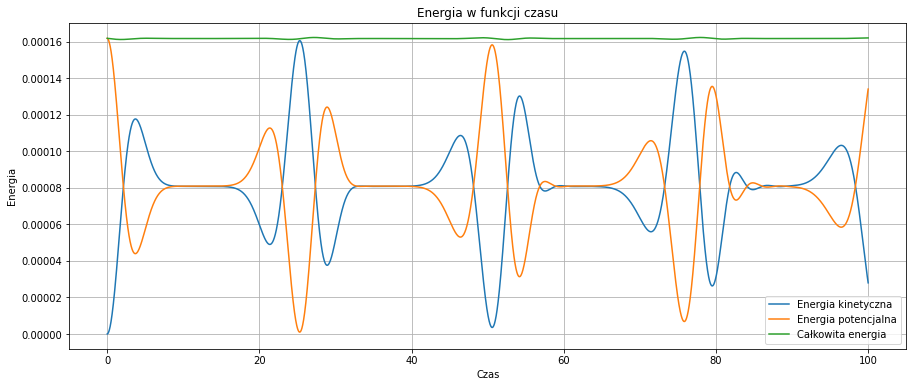

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
N = 50
dt = 0.02
delta = 0.1
alpha = 1
m = 1
nt = 5000
sigma = 3 * delta

# Funkcja obliczająca pochodne w procedurze RK4
def calculate_derivatives(s, s_dot, N, delta, alpha, m):
    s_dot_new = np.zeros_like(s_dot)
    s_double_dot = np.zeros_like(s_dot)
    
    # Obliczenie nowych prędkości
    for i in range(1, N):
        s_double_dot[i] = (alpha / m) * (s[i-1] - 2 * s[i] + s[i+1])
    
    # Warunki brzegowe
    s_double_dot[0] = 0
    s_double_dot[N] = 0
    
    # Nowe prędkości
    s_dot_new[1:N] = s_double_dot[1:N]
    
    return s_dot_new

# Warunki początkowe
x_max = delta * N
x_eq = np.arange(0, x_max + delta, delta) 
s_0 = x_eq + delta / 3 * np.exp(-((x_eq - x_max / 2)**2) / (2 * sigma**2)) # (20)
s_dot_0 = np.zeros_like(s_0) # (21)

# Lista przechowująca energię kinetyczną, potencjalną i całkowitą w kolejnych krokach czasowych
kinetic_energy = []
potential_energy = []
total_energy = []

# Lista przechowująca wychylenia cząstek w czasie
particle_displacements = [[] for _ in range(N + 1)]

# Symulacja propagacji zaburzenia w łańcuchu
s = s_0.copy()
s_dot = s_dot_0.copy()

for t in range(nt):
    # Obliczenie pochodnych w procedurze RK4
    k1 = calculate_derivatives(s, s_dot, N, delta, alpha, m)
    k2 = calculate_derivatives(s + 0.5 * dt * k1, s_dot, N, delta, alpha, m)
    k3 = calculate_derivatives(s + 0.5 * dt * k2, s_dot, N, delta, alpha, m)
    k4 = calculate_derivatives(s + dt * k3, s_dot, N, delta, alpha, m)
    
    s_dot += dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    
    # Obliczenie nowych położeń
    s += dt * s_dot
    
    # Zapis wychyleń cząstek
    for i in range(N + 1):
        particle_displacements[i].append(s[i])
    
    # Obliczenie energii kinetycznej
    kinetic = 0.5 * m * np.sum(s_dot[1:N]**2)
    kinetic_energy.append(kinetic)
    
    # Obliczenie energii potencjalnej
    potential = 0
    for i in range(1, N+1):
        potential += 0.5 * alpha * (s[i-1] - s[i] + delta)**2
    potential_energy.append(potential)
    
    # Całkowita energia
    total_energy.append(kinetic + potential)

# Konwersja list na tablice numpy
kinetic_energy = np.array(kinetic_energy)
potential_energy = np.array(potential_energy)
total_energy = np.array(total_energy)

# Czas symulacji
time = np.arange(0, nt*dt, dt)

# Wykresy energii
plt.figure(figsize=(15, 6))
plt.plot(time, kinetic_energy, label='Energia kinetyczna')
plt.plot(time, potential_energy, label='Energia potencjalna')
plt.plot(time, total_energy, label='Całkowita energia')
plt.xlabel('Czas')
plt.ylabel('Energia')
plt.title('Energia w funkcji czasu')
plt.legend()
plt.grid(True)
plt.show()





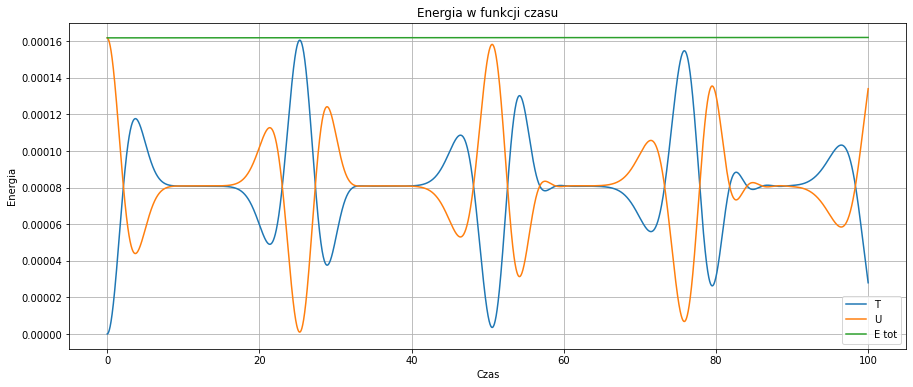

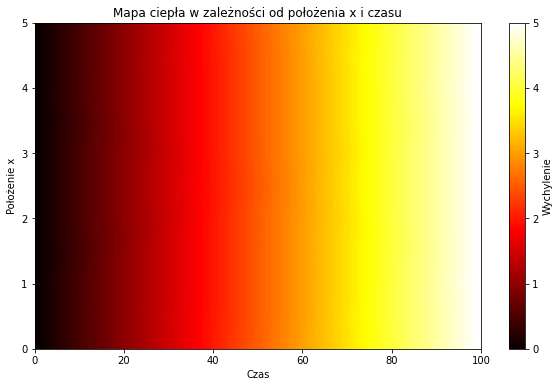

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
N = 50
dt = 0.02
delta = 0.1
alpha = 1
m = 1
nt = 5000
sigma = 3 * delta

# Funkcja obliczająca pochodne w procedurze RK4
def calculate_derivatives(s, s_dot, N, delta, alpha, m):
    s_dot_new = np.zeros_like(s_dot)
    s_double_dot = np.zeros_like(s_dot)
    
    # Obliczenie nowych prędkości
    for i in range(1, N):
        s_double_dot[i] = (alpha / m) * (s[i-1] - 2 * s[i] + s[i+1])
    
    # Warunki brzegowe
    s_double_dot[0] = 0
    s_double_dot[N] = 0
    
    # Nowe prędkości
    s_dot_new[1:N] = s_double_dot[1:N]
    
    return s_dot_new

# Warunki początkowe
x_max = delta * N
x_eq = np.arange(0, x_max + delta, delta) 
s_0 = x_eq + delta / 3 * np.exp(-((x_eq - x_max / 2)**2) / (2 * sigma**2)) # (20)
s_dot_0 = np.zeros_like(s_0) # (21)

# Lista przechowująca energię kinetyczną, potencjalną i całkowitą w kolejnych krokach czasowych
kinetic_energy = []
potential_energy = []
total_energy = []

# Lista przechowująca wychylenia cząstek w czasie
particle_displacements = [[] for _ in range(N + 1)]

# Symulacja propagacji zaburzenia w łańcuchu
s = s_0.copy()
s_dot = s_dot_0.copy()

for t in range(nt):
    # Obliczenie pochodnych w procedurze RK4
    k1 = calculate_derivatives(s, s_dot, N, delta, alpha, m)
    k2 = calculate_derivatives(s + 0.5 * dt * k1, s_dot, N, delta, alpha, m)
    k3 = calculate_derivatives(s + 0.5 * dt * k2, s_dot, N, delta, alpha, m)
    k4 = calculate_derivatives(s + dt * k3, s_dot, N, delta, alpha, m)
    
    s_dot += dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    
    # Obliczenie nowych położeń
    s += dt * s_dot
    
    # Zapis wychyleń cząstek
    for i in range(N + 1):
        particle_displacements[i].append(s[i])
    
    # Obliczenie energii kinetycznej
    kinetic = 0.5 * m * np.sum(s_dot[1:N]**2)
    kinetic_energy.append(kinetic)
    
    # Obliczenie energii potencjalnej
    potential = 0
    for i in range(1, N+1):
        potential += 0.5 * alpha * (s[i-1] - s[i] + delta)**2
    potential_energy.append(potential)
    
    # Całkowita energia
    total_energy.append(kinetic + potential)

# Konwersja list na tablice numpy
kinetic_energy = np.array(kinetic_energy)
potential_energy = np.array(potential_energy)
total_energy = np.array(total_energy)

# Czas symulacji
time = np.arange(0, nt*dt, dt)

# Wykresy energii
plt.figure(figsize=(15, 6))
plt.plot(time, kinetic_energy, label='T')
plt.plot(time, potential_energy, label='U')
plt.plot([time[0], time[nt-1]], [total_energy[0], total_energy[nt-1]], label='E tot')
plt.xlabel('Czas')
plt.ylabel('Energia')
plt.title('Energia w funkcji czasu')
plt.legend()
plt.savefig('energia')
plt.grid(True)
plt.show()

# Mapa ciepła w zależności od położenia x i czasu
plt.figure(figsize=(10, 6))
plt.imshow(np.array(particle_displacements).T, extent=[0, nt*dt, 0, x_max], aspect='auto', cmap='hot')
plt.colorbar(label='Wychylenie')
plt.xlabel('Czas')
plt.ylabel('Położenie x')
plt.title('Mapa ciepła w zależności od położenia x i czasu')
plt.show()



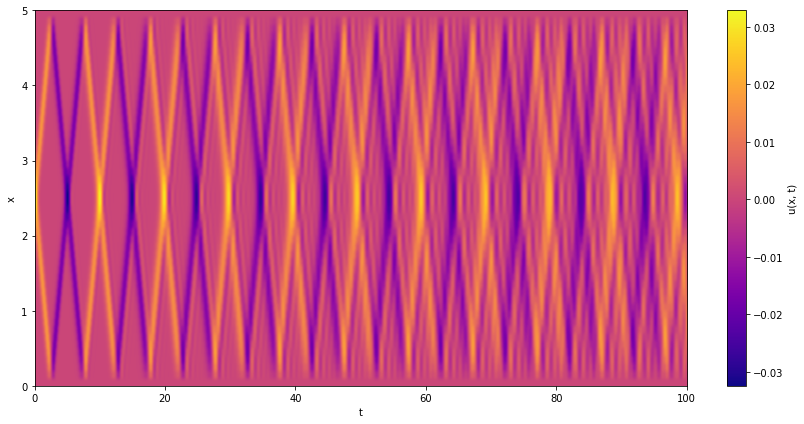

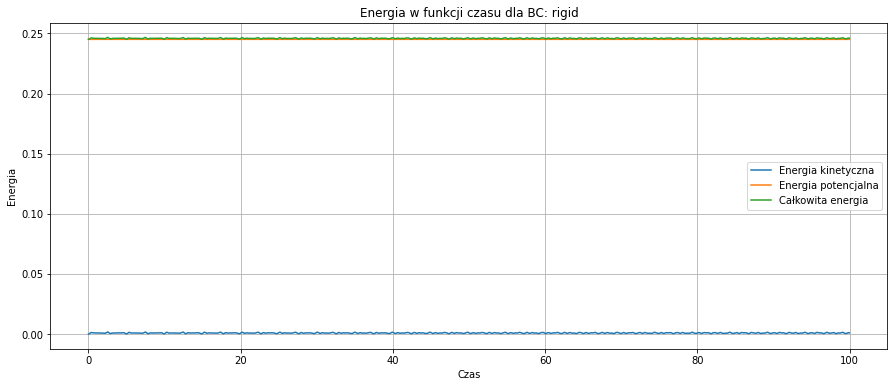

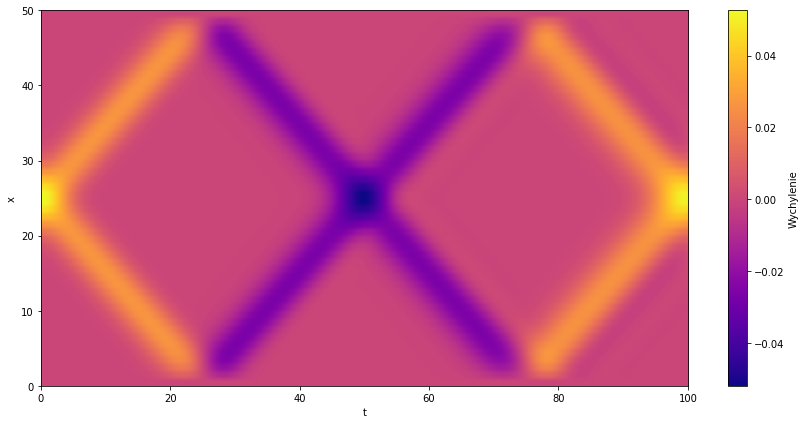

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
N = 50
dt = 0.02
delta = 0.1
alpha = 1
m = 1
nt = 5000
t_max = nt * dt
sigma = 3 * delta
x_max = delta * N
dx = delta  # Poprawka: dx powinno być równoważne delta
c = 1


# ================ ZAD 1 - RIGID BC ============================
def inic_string_rigid(boundary_conditions):
    u = np.zeros((N, nt))  # Wychylenie struny dla każdego kroku czasowego
    v = np.zeros((N, nt))
    a = np.zeros(N)  # Przyspieszenie
    # Warunki początkowe
    u[:, 0] = delta / 3 * np.exp(- ((np.linspace(0, x_max, N) - x_max / 2) ** 2) / (2 * sigma ** 2))  # (6) - warunki poczatkowe U_0
    # Warunek poczatkowy na zerowa prędkość struny:  u(x;dt) = u(x; 0)
    u[:, 1] = u[:, 0]
    a[1:N - 1] = (u[2:, 0] + u[:N - 2, 0] - 2 * u[1:N - 1, 0]) / dx ** 2

    if boundary_conditions == 'rigid':
        u[0, :] = 0
        u[N - 1, :] = 0  # ostatni element x = 1 = L
        v[0, :] = 0  # Poprawka: Warunki brzegowe dla prędkości
        v[N - 1, :] = 0

    for t in range(2, nt):
        if boundary_conditions == 'loose':
            # Podstawienie przed obliczeniem przyspieszenia
            u[0, :] = u[1, :]
            u[N - 1, :] = u[N - 2, :]
            v[0, :] = v[1, :]  # Poprawka: Warunki brzegowe dla prędkości
            v[N - 1, :] = v[N - 2, :]
        # Obliczenie przyspieszenia
        a[1:N - 1] = (u[2:, t - 1] + u[:N - 2, t - 1] - 2 * u[1:N - 1, t - 1]) / dx ** 2

        # Położeniowy schemat Verleta
        for i in range(1, N - 1):
            u[i, t] = 2 * u[i, t - 1] - u[i, t - 2] + c ** 2 * dt ** 2 * a[i]

        # Obliczenie prędkości
        for i in range(1, N - 1):
            v[i, t] = (u[i, t] - u[i, t - 2]) / (2 * dt)
    return u, v


def plotting(u, v, bc, plot_all=0):
    colors = ['red', 'blue', 'black', 'green']
    timesteps = [0, 80, 20, 40]

    # Rysowanie wykresów
    x_vals = np.linspace(0, x_max, N)
    t_vals = np.linspace(0, t_max, int(t_max / dt) + 1)
    u_n = u * 1.6
    plt.figure(figsize=(12, 6))
    plt.imshow(u, extent=[0, t_max, 0, x_max], aspect='auto', cmap='plasma', origin='lower')
    plt.colorbar(label='u(x, t)')
    plt.xlabel('t')
    plt.ylabel('x')
    # plt.title(f'Mapa gęstości wychylenia struny, BC: {bc}')
    plt.tight_layout()
    plt.savefig(f'{bc}_mapa_u')
    plt.show()


u, v = inic_string_rigid('rigid')
plotting(u, v, 'rigid', 0)


def calculate_energy(u, v, dx, m, alpha):
    kinetic_energy = np.zeros(nt)
    potential_energy = np.zeros(nt)

    for t in range(nt):
        # Obliczenie energii kinetycznej
        kinetic = 0.5 * m * np.sum(v[:, t] ** 2) * dx
        kinetic_energy[t] = kinetic

        # Obliczenie energii potencjalnej
        potential = 0
        for i in range(1, N):
            du = u[i - 1, t] - u[i, t] + delta
            potential += 0.5 * alpha * (du ** 2)
        potential_energy[t] = potential

    total_energy = kinetic_energy + potential_energy

    return kinetic_energy, potential_energy, total_energy


def plotting_with_energy(u, v, bc):
    colors = ['red', 'blue', 'black', 'green']
    timesteps = [0, 80, 20, 40]

    # Obliczenie energii
    dx = delta
    m = 1
    alpha = 1
    kinetic_energy, potential_energy, total_energy = calculate_energy(u, v, dx, m, alpha)
    # Rysowanie wykresów

    t_vals = np.arange(0, nt * dt, dt)
    # Rysowanie wykresów energii
    plt.figure(figsize=(15, 6))
    plt.plot(t_vals, kinetic_energy, label='Energia kinetyczna')
    plt.plot(t_vals, potential_energy, label='Energia potencjalna')
    plt.plot(t_vals, total_energy, label='Całkowita energia')
    plt.xlabel('Czas')
    plt.ylabel('Energia')
    plt.title(f'Energia w funkcji czasu dla BC: {bc}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Rysowanie wykresu wychylenia
    u_n = u * 1.6
    plt.figure(figsize=(12, 6))
    plt.imshow(u_n[:, 0:500], extent=[0, nt * dt, 0, x_max * 10], aspect='auto', cmap='plasma', origin='lower')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.colorbar(label='Wychylenie')
    plt.tight_layout()
    plt.savefig(f'{bc}_mapa_u')
    plt.show()


u, v = inic_string_rigid('rigid')
plotting_with_energy(u, v, 'rigid')


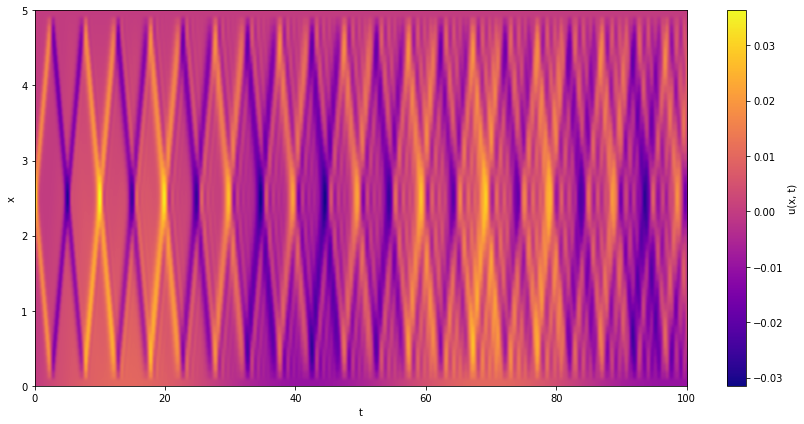

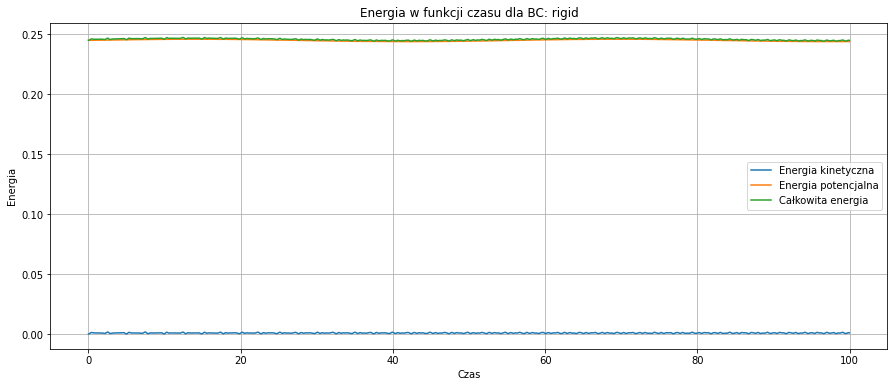

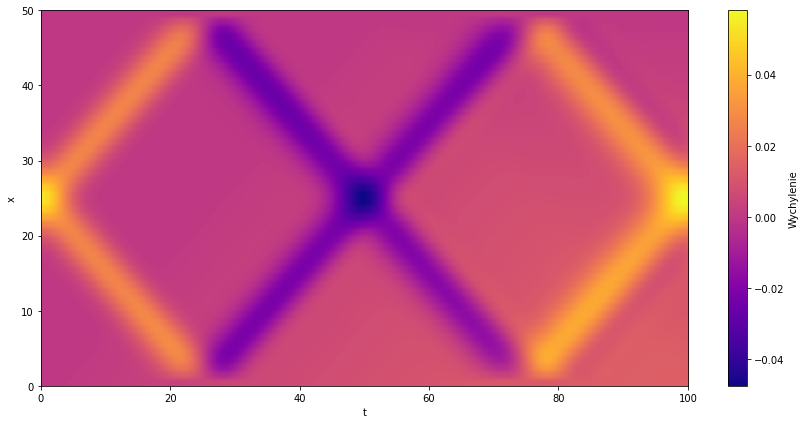

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
N = 50
dt = 0.02
delta = 0.1
alpha = 1
m = 1
nt = 5000
t_max = nt * dt
sigma = 3 * delta
x_max = delta * N
dx = delta  # Poprawka: dx powinno być równoważne delta
c = 1

# Dodatkowe parametry dla siły wymuszającej
F = 0.01
r = 2

# Częstości
n_values = [0.9, 1.0, 1.1, 1.5, 2.0, 5.0]

# Funkcja wyliczająca częstość omega_n dla danej wartości n
def omega_n(n):
    return 2 * r * alpha * np.sin(n * np.pi / (2 * N))

# Funkcja obliczająca siłę wymuszającą w danym kroku czasowym t
def forcing(t):
    return F * np.sin(omega_n(n_values[0]) * t)

# ================ ZAD 1 - RIGID BC ============================
def inic_string_rigid(boundary_conditions):
    u = np.zeros((N, nt))  # Wychylenie struny dla każdego kroku czasowego
    v = np.zeros((N, nt))
    a = np.zeros(N)  # Przyspieszenie
    # Warunki początkowe
    u[:, 0] = delta / 3 * np.exp(- ((np.linspace(0, x_max, N) - x_max / 2) ** 2) / (2 * sigma ** 2))  # (6) - warunki poczatkowe U_0
    # Warunek początkowy na zerowa prędkość struny:  u(x;dt) = u(x; 0)
    u[:, 1] = u[:, 0]
    a[1:N - 1] = (u[2:, 0] + u[:N - 2, 0] - 2 * u[1:N - 1, 0]) / dx ** 2

    if boundary_conditions == 'rigid':
        u[0, :] = 0
        u[N - 1, :] = 0  # ostatni element x = 1 = L
        v[0, :] = 0  # Poprawka: Warunki brzegowe dla prędkości
        v[N - 1, :] = 0

    for t in range(2, nt):
        if boundary_conditions == 'loose':
            # Podstawienie przed obliczeniem przyspieszenia
            u[0, :] = u[1, :]
            u[N - 1, :] = u[N - 2, :]
            v[0, :] = v[1, :]  # Poprawka: Warunki brzegowe dla prędkości
            v[N - 1, :] = v[N - 2, :]
        # Obliczenie przyspieszenia
        a[1:N - 1] = (u[2:, t - 1] + u[:N - 2, t - 1] - 2 * u[1:N - 1, t - 1]) / dx ** 2

        # Położeniowy schemat Verleta
        for i in range(1, N - 1):
            u[i, t] = 2 * u[i, t - 1] - u[i, t - 2] + c ** 2 * dt ** 2 * a[i]

        # Obliczenie prędkości
        for i in range(1, N - 1):
            v[i, t] = (u[i, t] - u[i, t - 2]) / (2 * dt)

        # Dodanie siły wymuszającej
        u[0, t] += forcing(t * dt)

    return u, v


def plotting(u, v, bc, plot_all=0):
    colors = ['red', 'blue', 'black', 'green']
    timesteps = [0, 80, 20, 40]

    # Rysowanie wykresów
    x_vals = np.linspace(0, x_max, N)
    t_vals = np.linspace(0, t_max, int(t_max / dt) + 1)
    u_n = u * 1.6
    plt.figure(figsize=(12, 6))
    plt.imshow(u, extent=[0, t_max, 0, x_max], aspect='auto', cmap='plasma', origin='lower')
    plt.colorbar(label='u(x, t)')
    plt.xlabel('t')
    plt.ylabel('x')
    # plt.title(f'Mapa gęstości wychylenia struny, BC: {bc}')
    plt.tight_layout()
    plt.savefig(f'{bc}_mapa_u')
    plt.show()


u, v = inic_string_rigid('rigid')
plotting(u, v, 'rigid', 0)


def calculate_energy(u, v, dx, m, alpha):
    kinetic_energy = np.zeros(nt)
    potential_energy = np.zeros(nt)

    for t in range(nt):
        # Obliczenie energii kinetycznej
        kinetic = 0.5 * m * np.sum(v[:, t] ** 2) * dx
        kinetic_energy[t] = kinetic

        # Obliczenie energii potencjalnej
        potential = 0
        for i in range(1, N):
            du = u[i - 1, t] - u[i, t] + delta
            potential += 0.5 * alpha * (du ** 2)
        potential_energy[t] = potential

    total_energy = kinetic_energy + potential_energy

    return kinetic_energy, potential_energy, total_energy


def plotting_with_energy(u, v, bc):
    colors = ['red', 'blue', 'black', 'green']
    timesteps = [0, 80, 20, 40]

    # Obliczenie energii
    dx = delta
    m = 1
    alpha = 1
    kinetic_energy, potential_energy, total_energy = calculate_energy(u, v, dx, m, alpha)
    # Rysowanie wykresów

    t_vals = np.arange(0, nt * dt, dt)
    # Rysowanie wykresów energii
    plt.figure(figsize=(15, 6))
    plt.plot(t_vals, kinetic_energy, label='Energia kinetyczna')
    plt.plot(t_vals, potential_energy, label='Energia potencjalna')
    plt.plot(t_vals, total_energy, label='Całkowita energia')
    plt.xlabel('Czas')
    plt.ylabel('Energia')
    plt.title(f'Energia w funkcji czasu dla BC: {bc}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Rysowanie wykresu wychylenia
    u_n = u * 1.6
    plt.figure(figsize=(12, 6))
    plt.imshow(u_n[:, 0:500], extent=[0, nt * dt, 0, x_max * 10], aspect='auto', cmap='plasma', origin='lower')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.colorbar(label='Wychylenie')
    plt.tight_layout()
    plt.savefig(f'{bc}_mapa_u')
    plt.show()


u, v = inic_string_rigid('rigid')
plotting_with_energy(u, v, 'rigid')
